In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import itertools
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from package.check_data import check_data
from package.transform import encode_train_test
from package.evaluation import cal_performance_model

pd.set_option('display.max_columns', None)

# Attributes Description

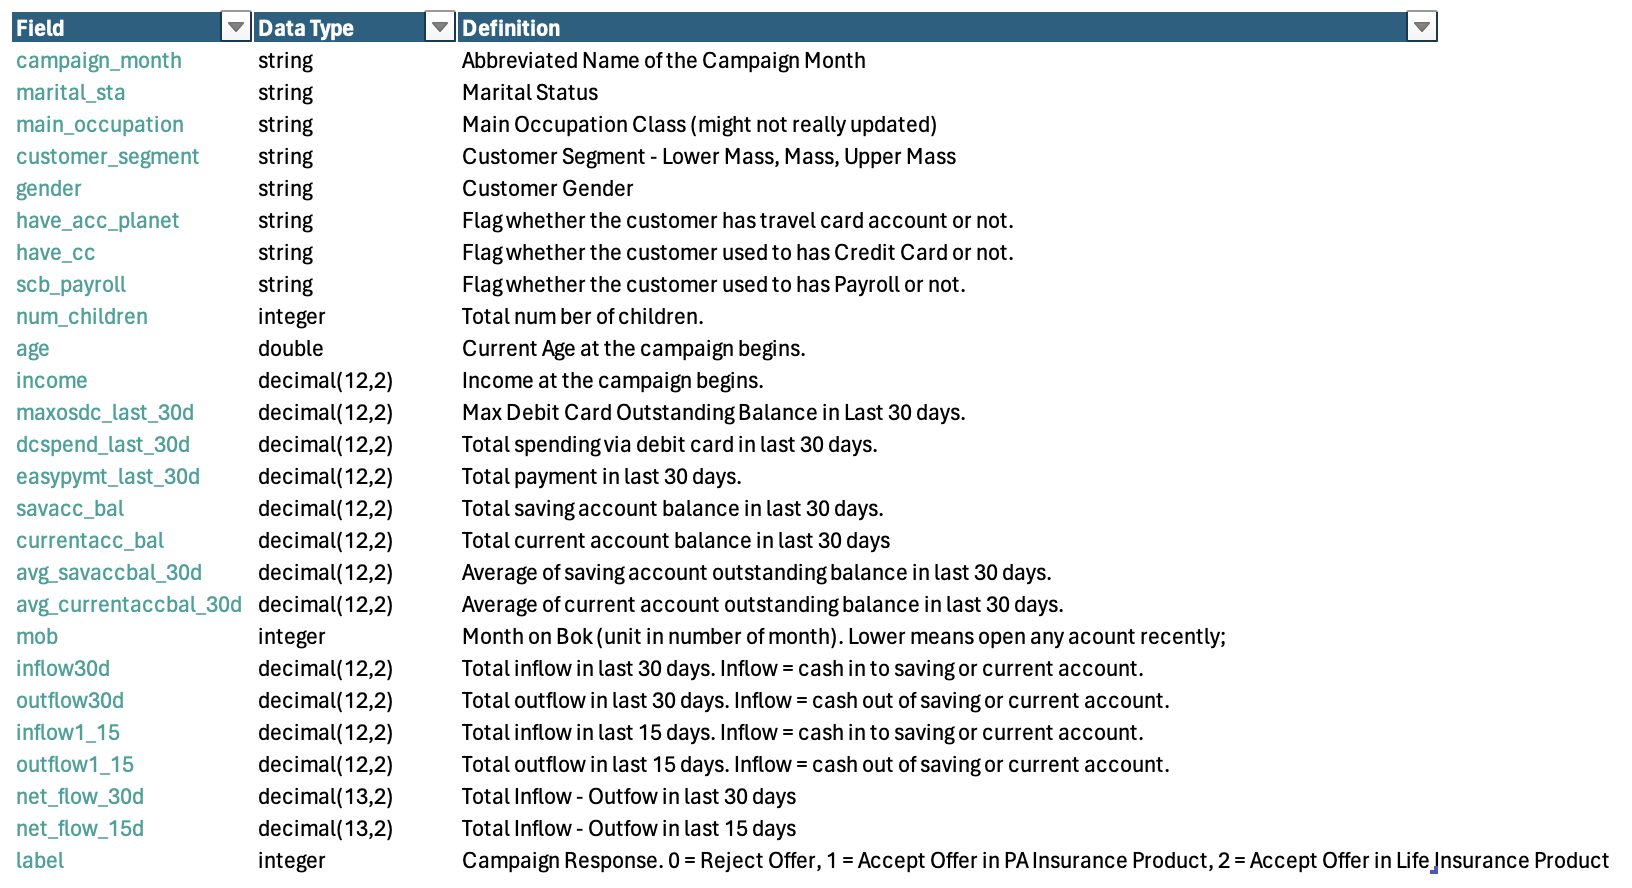

# Profiling

In [2]:
df = pd.read_csv('dsc_test_case.csv')
check_data(df)

shape:  (215993, 26)


,Column,Type,%Null,#Null,#Unique,MinMeanMax_or_Unique
0,campaign_month,object,0.0,0,12,"[Mar, Jul, Jan, Nov, Oct, Sep, Apr, Jun, Dec, ..."
1,marital_sta,object,2.1,4635,8,"[โสด, สมรส, สมรสจด ทะเบียน, หย่าร้าง, ม่าย, อื..."
2,main_occupation,object,0.7,1500,10,"[Salary man, Self-employed, Freelance, Housewi..."
3,customer_segment,object,0.7,1500,3,"[Lower Mass, Mass, Upper Mass, nan]"
4,gender,object,0.7,1500,2,"[Female, Male, nan]"
5,have_acc_planet,object,1.1,2401,2,"[N, Y, nan]"
6,have_cc,object,0.7,1500,2,"[N, Y, nan]"
7,scb_payroll,object,0.7,1500,2,"[Y, N, nan]"
8,num_children,float64,0.7,1500,9,"[0.0, 0.04038826441888547, 21.0]"
9,age,float64,0.7,1500,39,"[23.0, 37.78451511238129, 61.0]"


## Check null

In [3]:
df[df['have_acc_planet'].isnull()]

,campaign_month,marital_sta,main_occupation,customer_segment,gender,have_acc_planet,have_cc,scb_payroll,num_children,age,income,maxosdc_last_30d,dcspend_last_30d,easypymt_last_30d,savacc_bal,currentacc_bal,avg_savaccbal_30d,avg_currentaccbal_30d,mob,inflow30d,outflow30d,inflow1_15,outflow1_15,net_flow_30d,net_flow_15d,label
147,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
187,Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
230,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
250,Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
495,Dec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215733,Mar,โสด,Self-employed,Mass,Male,NaN,N,N,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
215814,Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
215830,Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
215945,Mar,สมรส,Self-employed,Mass,Male,NaN,N,N,0.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


row ที่ null ส่วนใหญ่จะ null เกือบทุก columns และ null เพียง 1% -> drop row

In [4]:
df['label'].value_counts(normalize=True)*100

0    98.786072
1     0.756506
2     0.457422
Name: label, dtype: float64

In [5]:
df[df['have_acc_planet'].notna()]['label'].value_counts(normalize=True)*100

0    98.775235
1     0.764542
2     0.460223
Name: label, dtype: float64

ถ้า drop row propotion label ไม่แตกต่างจากเดิมมาก

## Clean & Impute data

In [6]:
df_prep = df.copy()
# drop row -> 1.1%
df_prep = df_prep[df_prep['have_acc_planet'].notna()]
check_data(df_prep)

shape:  (213592, 26)


,Column,Type,%Null,#Null,#Unique,MinMeanMax_or_Unique
0,campaign_month,object,0.0,0,12,"[Mar, Jul, Jan, Nov, Oct, Sep, Apr, Jun, Dec, ..."
1,marital_sta,object,1.5,3134,8,"[โสด, สมรส, สมรสจด ทะเบียน, หย่าร้าง, ม่าย, อื..."
2,main_occupation,object,0.0,0,10,"[Salary man, Self-employed, Freelance, Housewi..."
3,customer_segment,object,0.0,0,3,"[Lower Mass, Mass, Upper Mass]"
4,gender,object,0.0,0,2,"[Female, Male]"
5,have_acc_planet,object,0.0,0,2,"[N, Y]"
6,have_cc,object,0.0,0,2,"[N, Y]"
7,scb_payroll,object,0.0,0,2,"[Y, N]"
8,num_children,float64,0.0,0,9,"[0.0, 0.040422862279486126, 21.0]"
9,age,float64,0.0,0,39,"[23.0, 37.783025581482455, 61.0]"


In [7]:
# impute unknown
df_prep['marital_sta'] = df_prep['marital_sta'].fillna("unknown")
check_data(df_prep)

shape:  (213592, 26)


,Column,Type,%Null,#Null,#Unique,MinMeanMax_or_Unique
0,campaign_month,object,0.0,0,12,"[Mar, Jul, Jan, Nov, Oct, Sep, Apr, Jun, Dec, ..."
1,marital_sta,object,0.0,0,9,"[โสด, สมรส, สมรสจด ทะเบียน, หย่าร้าง, ม่าย, อื..."
2,main_occupation,object,0.0,0,10,"[Salary man, Self-employed, Freelance, Housewi..."
3,customer_segment,object,0.0,0,3,"[Lower Mass, Mass, Upper Mass]"
4,gender,object,0.0,0,2,"[Female, Male]"
5,have_acc_planet,object,0.0,0,2,"[N, Y]"
6,have_cc,object,0.0,0,2,"[N, Y]"
7,scb_payroll,object,0.0,0,2,"[Y, N]"
8,num_children,float64,0.0,0,9,"[0.0, 0.040422862279486126, 21.0]"
9,age,float64,0.0,0,39,"[23.0, 37.783025581482455, 61.0]"


# Visualization

In [92]:
df_plot = df_prep.groupby('campaign_month').agg(
    campaign_count=('campaign_month', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_plot['campaign_month'] = pd.Categorical(df_plot['campaign_month'], categories=month_order, ordered=True)
df_plot = df_plot.sort_values('campaign_month').reset_index(drop=True)
df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['campaign_count'])*100
df_plot

,campaign_month,campaign_count,accept_offer,conversion_rate
0,Jan,22282,289,1.297011
1,Feb,21585,178,0.824647
2,Mar,21036,181,0.860430
3,Apr,21933,240,1.094242
4,May,14672,180,1.226827
5,Jun,10179,178,1.748698
6,Jul,11242,214,1.903576
7,Aug,11107,217,1.953723
8,Sep,11210,212,1.891169
9,Oct,23625,252,1.066667


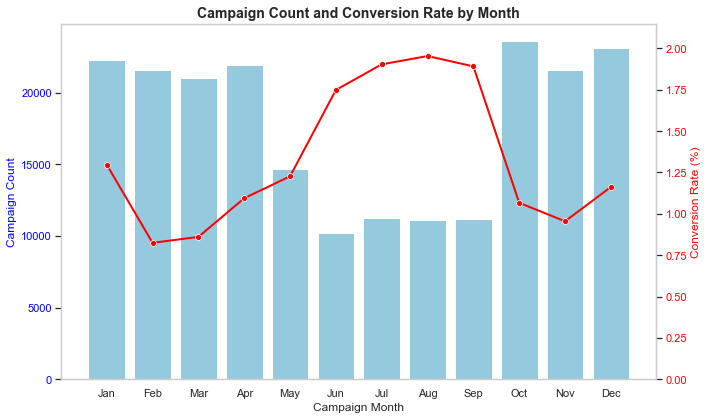

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Bar plot for campaign_count ---
sns.barplot(
    x='campaign_month', 
    y='campaign_count', 
    data=df_plot, 
    color='skyblue', 
    ax=ax1
)

# Label for bar axis
ax1.set_ylabel('Campaign Count', color='blue', fontsize=12)
ax1.set_xlabel('Campaign Month', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(False)

# --- Secondary axis for conversion_rate ---
ax2 = ax1.twinx()
sns.lineplot(
    x='campaign_month', 
    y='conversion_rate', 
    data=df_plot, 
    color='red', 
    marker='o', 
    linewidth=2, 
    ax=ax2
)

ax2.set_ylabel('Conversion Rate (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, df_plot['conversion_rate'].max() * 1.1)
ax2.grid(False)

# --- Titles and Layout ---
plt.title('Campaign Count and Conversion Rate by Month', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [88]:
df_plot = df_prep.groupby('campaign_month').agg(
    PA_Insurance_Product = ('label', lambda x: (x==1).sum()),
    Life_Insurance_Product = ('label', lambda x: (x==2).sum())
).reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_plot['campaign_month'] = pd.Categorical(df_plot['campaign_month'], categories=month_order, ordered=True)
df_plot = df_plot.sort_values('campaign_month').reset_index(drop=True)
df_plot = df_plot.melt(id_vars='campaign_month', 
                       value_vars=['PA_Insurance_Product', 'Life_Insurance_Product'],
                       var_name='Label', value_name='Count')
df_plot.head()

,campaign_month,Label,Count
0,Jan,PA_Insurance_Product,166
1,Feb,PA_Insurance_Product,63
2,Mar,PA_Insurance_Product,70
3,Apr,PA_Insurance_Product,138
4,May,PA_Insurance_Product,136


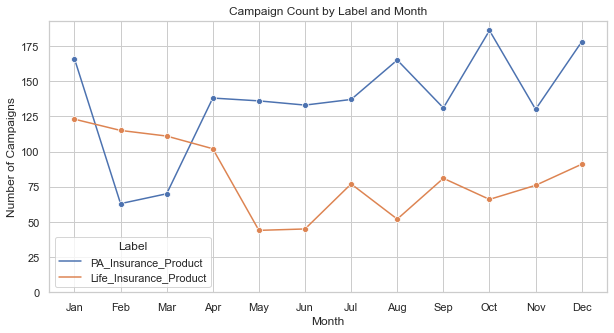

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))
sns.lineplot(data=df_plot, x='campaign_month', y='Count', hue='Label', marker='o')
plt.title('Campaign Count by Label and Month')
plt.xlabel('Month')
plt.ylabel('Number of Campaigns')
plt.ylim(0)
#plt.legend(loc='upper right')
plt.show()

In [127]:
df_plot = df_prep.groupby(['gender']).agg(
    count =('gender', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot

,gender,count,accept_offer,conversion_rate
0,Female,120687,1297,1.074681
1,Male,92905,1319,1.419730


No handles with labels found to put in legend.


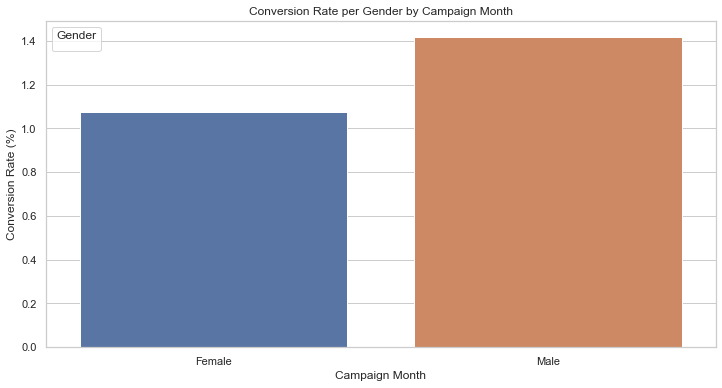

In [130]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot, 
    x='gender', 
    y='conversion_rate', 
)
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Campaign Month')
plt.title('Conversion Rate per Gender by Campaign Month')
plt.legend(title='Gender')
plt.show()

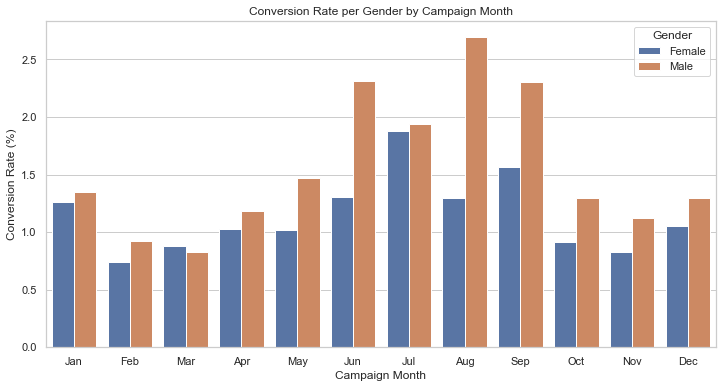

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Aggregate by campaign_month and gender only (ignoring age) for cleaner barplot
df_gender_month = df_prep.groupby(['campaign_month', 'gender']).agg(
    campaign_count=('campaign_month', 'count'),
    accept_offer=('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

# Order months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_gender_month['campaign_month'] = pd.Categorical(df_gender_month['campaign_month'], 
                                                   categories=month_order, 
                                                   ordered=True)

# Sort
df_gender_month = df_gender_month.sort_values('campaign_month').reset_index(drop=True)

# Conversion rate
df_gender_month['conversion_rate'] = (df_gender_month['accept_offer'] / df_gender_month['campaign_count']) * 100

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_gender_month, 
    x='campaign_month', 
    y='conversion_rate', 
    hue='gender'
)
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Campaign Month')
plt.title('Conversion Rate per Gender by Campaign Month')
plt.legend(title='Gender')
plt.show()


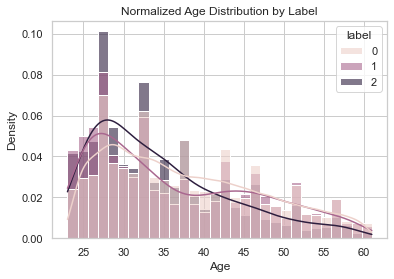

In [133]:
sns.histplot(
    data=df_prep,
    x="age",
    hue="label",
    stat="density",  # normalizes each group
    common_norm=False,   # ensures normalization is done separately for each hue
    kde=True,            # optional: add smooth density curve
    bins=30,             # adjust bins as needed
    alpha=0.6
)

plt.title("Normalized Age Distribution by Label")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

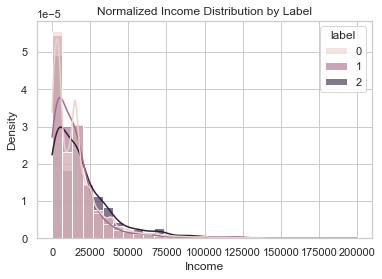

In [135]:
sns.histplot(
    data=df_prep,
    x="income",
    hue="label",
    stat="density",  # normalizes each group
    common_norm=False,   # ensures normalization is done separately for each hue
    kde=True,            # optional: add smooth density curve
    bins=30,             # adjust bins as needed
    alpha=0.6
)

plt.title("Normalized Income Distribution by Label")
plt.xlabel("Income")
plt.ylabel("Density")
plt.show()

In [144]:
df_plot = df_prep.groupby(['main_occupation']).agg(
    count =('main_occupation', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot = df_plot.sort_values(by='conversion_rate',ascending=False)
df_plot

,main_occupation,count,accept_offer,conversion_rate
0,Entertainer,244,5,2.049180
8,Student,17287,279,1.613930
1,Freelance,19057,250,1.311854
6,Salary man,102355,1244,1.215378
7,Self-employed,56117,673,1.199280
9,Unemployed,6851,77,1.123924
3,Housewife,4246,41,0.965615
5,Professional,1402,12,0.855920
2,Government,5974,35,0.585872
4,Other/Unknown,59,0,0.000000


No handles with labels found to put in legend.


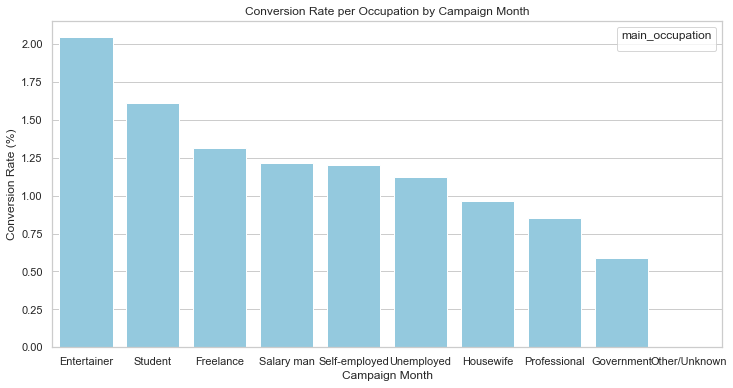

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot, 
    x='main_occupation', 
    y='conversion_rate', color='skyblue'
)
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Campaign Month')
plt.title('Conversion Rate per Occupation by Campaign Month')
plt.legend(title='main_occupation')
plt.show()

In [147]:
df_plot = df_prep.groupby(['marital_sta']).agg(
    count =('marital_sta', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot = df_plot.sort_values(by='conversion_rate',ascending=False)
df_plot

,marital_sta,count,accept_offer,conversion_rate
7,แยกกันอยู่,111,2,1.801802
8,โสด,151850,1999,1.316431
4,สมรสไม่ จดทะเบียน,842,10,1.187648
1,ม่าย,937,11,1.173959
0,unknown,3134,35,1.116784
6,อื่นๆ,1439,15,1.042391
5,หย่าร้าง,2624,27,1.028963
2,สมรส,45820,452,0.986469
3,สมรสจด ทะเบียน,6835,65,0.950988


In [150]:
df_plot = df_prep.groupby(['customer_segment']).agg(
    count =('customer_segment', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot = df_plot.sort_values(by='conversion_rate',ascending=False)
df_plot

,customer_segment,count,accept_offer,conversion_rate
0,Lower Mass,105219,1329,1.263080
2,Upper Mass,11358,138,1.215003
1,Mass,97015,1149,1.184353


No handles with labels found to put in legend.


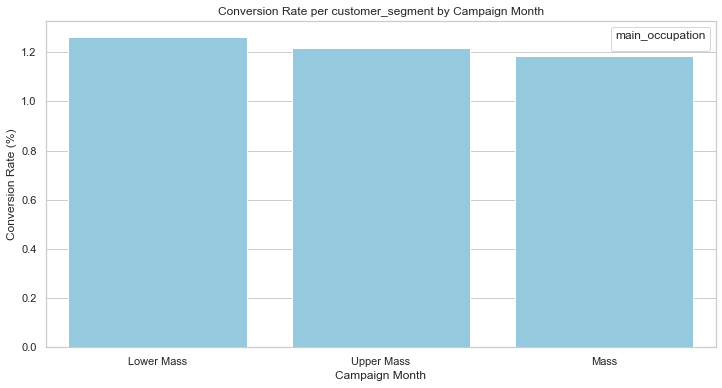

In [152]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_plot, 
    x='customer_segment', 
    y='conversion_rate', color='skyblue'
)
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Campaign Month')
plt.title('Conversion Rate per customer_segment by Campaign Month')
plt.legend(title='main_occupation')
plt.show()

In [154]:
df_plot = df_prep.groupby(['have_acc_planet']).agg(
    count =('have_acc_planet', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot

,have_acc_planet,count,accept_offer,conversion_rate
0,N,210167,2589,1.231878
1,Y,3425,27,0.788321


In [156]:
df_plot = df_prep.groupby(['have_cc']).agg(
    count =('have_cc', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot

,have_cc,count,accept_offer,conversion_rate
0,N,192165,2409,1.253610
1,Y,21427,207,0.966071


In [157]:
df_plot = df_prep.groupby(['scb_payroll']).agg(
    count =('scb_payroll', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot

,scb_payroll,count,accept_offer,conversion_rate
0,N,169828,2005,1.180606
1,Y,43764,611,1.396125


In [158]:
df_plot = df_prep.groupby(['num_children']).agg(
    count =('num_children', 'count'),
    accept_offer = ('label', lambda x: (x.isin([1,2])).sum())
).reset_index()

df_plot['conversion_rate'] = (df_plot['accept_offer']/df_plot['count'])*100
df_plot

,num_children,count,accept_offer,conversion_rate
0,0.0,206825,2545,1.230509
1,1.0,5187,58,1.118180
2,2.0,1369,11,0.803506
3,3.0,179,2,1.117318
4,4.0,24,0,0.000000
5,5.0,5,0,0.000000
6,10.0,1,0,0.000000
7,20.0,1,0,0.000000
8,21.0,1,0,0.000000


# Predictive Model

## Feature Engineering

In [12]:
df_model = df_prep.copy()
# convert to eng
df_model['marital_sta'] = df_model['marital_sta'].replace({'โสด': 'Single','สมรส': 'Married',
                                                           'สมรสจด ทะเบียน': 'Married (Registered)','หย่าร้าง': 'Divorced',
                                                           'ม่าย': 'Widowed','อื่นๆ': 'Other','unknown': 'Unknown',
                                                           'สมรสไม่ จดทะเบียน': 'Married (Unregistered)','แยกกันอยู่': 'Separated'})
# customer loyalty
df_model['have_acc_planet'] = df_model['have_acc_planet'].replace({'Y':1,'N':0})
df_model['have_cc'] = df_model['have_cc'].replace({'Y':1,'N':0})
df_model['scb_payroll'] = df_model['scb_payroll'].replace({'Y':1,'N':0})
df_model['num_products'] = df_model['have_acc_planet']+df_model['have_cc']+df_model['scb_payroll']

# Spending behavior; high ratio may indicate lower affordability
df_model['spend_to_income_ratio'] = np.where(
    df_model['income'] == 0,
    0,
    df_model['dcspend_last_30d'] / df_model['income']
)

df_model['label'] = df_model['label'].replace({0:0,1:1,2:1})
df_model

,campaign_month,marital_sta,main_occupation,customer_segment,gender,have_acc_planet,have_cc,scb_payroll,num_children,age,income,maxosdc_last_30d,dcspend_last_30d,easypymt_last_30d,savacc_bal,currentacc_bal,avg_savaccbal_30d,avg_currentaccbal_30d,mob,inflow30d,outflow30d,inflow1_15,outflow1_15,net_flow_30d,net_flow_15d,label,num_products,spend_to_income_ratio
0,Mar,Single,Salary man,Lower Mass,Female,0,0,1,0.0,41.0,11017.00,15242.93,0.0,210.0,6442.93,0.0,2034.46,0.0,77.0,0.00,0.00,0.00,0.00,0.0,0.0,0,1,0.0
1,Jul,Married,Salary man,Mass,Female,0,0,0,1.0,46.0,15140.15,0.00,0.0,0.0,0.00,0.0,0.00,0.0,14.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
2,Jan,Single,Self-employed,Lower Mass,Male,0,0,0,0.0,36.0,452.87,1205.00,0.0,1486.0,1099.71,0.0,217.77,0.0,37.0,13558.67,14454.97,13558.67,14454.97,-896.3,-896.3,0,0,0.0
3,Nov,Single,Salary man,Mass,Female,0,0,0,0.0,38.0,12036.17,0.00,0.0,0.0,45554.61,0.0,45554.61,0.0,165.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
4,Oct,Married (Registered),Salary man,Mass,Female,0,0,0,0.0,41.0,25000.00,1896.51,0.0,5900.0,1224.51,0.0,1238.59,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215988,Oct,Single,Self-employed,Mass,Male,0,0,0,0.0,40.0,2168.40,5201.10,0.0,4222.0,238.16,0.0,1775.73,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
215989,Mar,Single,Salary man,Lower Mass,Male,0,0,0,0.0,44.0,12451.67,13224.02,0.0,507.0,6369.57,0.0,4819.38,0.0,99.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
215990,Oct,Single,Salary man,Mass,Female,0,0,0,0.0,40.0,25000.00,0.00,0.0,0.0,139527.37,0.0,159341.85,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0
215991,Oct,Single,Self-employed,Lower Mass,Female,0,0,0,0.0,39.0,7935.12,3040.63,0.0,884.0,304.00,0.0,1103.81,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0.0


In [13]:
df_model['label'].value_counts(normalize=True)*100

0    98.775235
1     1.224765
Name: label, dtype: float64

In [75]:
df_model['label'].value_counts()

0    210976
1      2616
Name: label, dtype: int64

ข้อมูล imbalance -> 1.22%

## Split Data

In [14]:
X = df_model.drop(columns=['campaign_month','label'])
y = df_model['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Transform

In [16]:
X_train_enc, X_test_enc = encode_train_test(X_train=X_train, 
                                            X_test=X_test, 
                                            cat_cols=['marital_sta', 'main_occupation', 'customer_segment','gender'])

## Train model

In [17]:
xgb_clf = xgb.XGBClassifier(random_state=42)

In [18]:
# XGBoost recommends: scale_pos_weight = (num_neg / num_pos)
num_pos = sum(y_train == 1)
num_neg = sum(y_train == 0)
scale_pos_weight = num_neg / num_pos

print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 80.64022933588151


In [19]:
param_grid = {
    'max_depth': [5,6,7],
    'learning_rate': [0.1,0.3,0.5],
    'n_estimators': [100,300,500],
    'subsample': [0.7,0.8,1.0],
    'colsample_bytree': [0.7,0.8,1.0],
    'scale_pos_weight': [80,90,95]
}

In [29]:
%%time
# Prepare grid combinations
keys, values = zip(*param_grid.items())
grid_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

# DataFrame to log results
log_df = pd.DataFrame()

# Grid search loop
for i, params in tqdm(enumerate(grid_combinations)):
    
    model = XGBClassifier(
        **params,
        random_state=42
    )
    
    # Fit model
    model.fit(X_train_enc, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train_enc)[:,1]
    y_test_prob = model.predict_proba(X_test_enc)[:,1]
    
    # Calculate performance
    train_perf = cal_performance_model(y_train, y_train_prob)
    test_perf = cal_performance_model(y_test, y_test_prob)
    
    # Combine params + performance into one dict
    log_entry = {**params, 
                 **{f"train_{k}": v for k,v in train_perf.items()},
                 **{f"test_{k}": v for k,v in test_perf.items()}}
    
    # Append to log
    log_df = pd.concat([log_df, pd.DataFrame([log_entry])], ignore_index=True)

729it [3:31:52, 17.44s/it] 

CPU times: user 3h 9min 49s, sys: 1h 17min 18s, total: 4h 27min 8s
Wall time: 3h 31min 52s


## Select Model

In [34]:
log_df.to_csv("xgb_gridsearch_log.csv", index=False)

In [37]:
log_df.sort_values(by='test_pr_auc',ascending=False).head(5)

,max_depth,learning_rate,n_estimators,subsample,colsample_bytree,scale_pos_weight,train_tp,train_fp,train_fn,train_tn,train_precision,train_recall,train_f1_score,train_pr_auc,test_tp,test_fp,test_fn,test_tn,test_precision,test_recall,test_f1_score,test_pr_auc
0,5,0.1,100,0.7,0.7,80,1683,48151,410,120629,0.033772,0.804109,0.064822,0.075690,281,12092,242,30104,0.022711,0.537285,0.043579,0.029593
251,6,0.1,100,0.7,1.0,95,1910,47315,183,121465,0.038801,0.912566,0.074438,0.146668,262,11995,261,30201,0.021376,0.500956,0.041002,0.028858
264,6,0.1,100,1.0,0.8,80,1802,41384,291,127396,0.041726,0.860965,0.079595,0.168036,264,10539,259,31657,0.024438,0.504780,0.046618,0.028595
14,5,0.1,100,0.8,0.8,95,1828,59542,265,109238,0.029787,0.873387,0.057608,0.077947,338,15088,185,27108,0.021911,0.646272,0.042385,0.028101
16,5,0.1,100,0.8,1.0,90,1803,55374,290,113406,0.031534,0.861443,0.060840,0.085212,312,14034,211,28162,0.021748,0.596558,0.041967,0.027740


In [38]:
log_df

,max_depth,learning_rate,n_estimators,subsample,colsample_bytree,scale_pos_weight,train_tp,train_fp,train_fn,train_tn,train_precision,train_recall,train_f1_score,train_pr_auc,test_tp,test_fp,test_fn,test_tn,test_precision,test_recall,test_f1_score,test_pr_auc
0,5,0.1,100,0.7,0.7,80,1683,48151,410,120629,0.033772,0.804109,0.064822,0.075690,281,12092,242,30104,0.022711,0.537285,0.043579,0.029593
1,5,0.1,100,0.7,0.7,90,1769,55597,324,113183,0.030837,0.845198,0.059503,0.074030,326,14123,197,28073,0.022562,0.623327,0.043548,0.026180
2,5,0.1,100,0.7,0.7,95,1806,59337,287,109443,0.029537,0.862876,0.057119,0.070851,324,15008,199,27188,0.021132,0.619503,0.040870,0.027592
3,5,0.1,100,0.7,0.8,80,1687,47892,406,120888,0.034027,0.806020,0.065296,0.076572,280,12138,243,30058,0.022548,0.535373,0.043273,0.025696
4,5,0.1,100,0.7,0.8,90,1758,55276,335,113504,0.030824,0.839943,0.059465,0.072613,313,14074,210,28122,0.021756,0.598470,0.041985,0.026324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,7,0.5,500,1.0,0.8,90,2093,7,0,168773,0.996667,1.000000,0.998331,0.999997,4,73,519,42123,0.051948,0.007648,0.013333,0.016496
725,7,0.5,500,1.0,0.8,95,2093,7,0,168773,0.996667,1.000000,0.998331,0.999997,2,79,521,42117,0.024691,0.003824,0.006623,0.016660
726,7,0.5,500,1.0,1.0,80,2093,7,0,168773,0.996667,1.000000,0.998331,0.999996,0,81,523,42115,0.000000,0.000000,0.000000,0.016812
727,7,0.5,500,1.0,1.0,90,2093,7,0,168773,0.996667,1.000000,0.998331,0.999996,1,71,522,42125,0.013889,0.001912,0.003361,0.016071


In [41]:
log_df_best = log_df.sort_values(by='test_pr_auc',ascending=False).reset_index(drop=True)
log_df_best

,max_depth,learning_rate,n_estimators,subsample,colsample_bytree,scale_pos_weight,train_tp,train_fp,train_fn,train_tn,train_precision,train_recall,train_f1_score,train_pr_auc,test_tp,test_fp,test_fn,test_tn,test_precision,test_recall,test_f1_score,test_pr_auc
0,5,0.1,100,0.7,0.7,80,1683,48151,410,120629,0.033772,0.804109,0.064822,0.075690,281,12092,242,30104,0.022711,0.537285,0.043579,0.029593
1,6,0.1,100,0.7,1.0,95,1910,47315,183,121465,0.038801,0.912566,0.074438,0.146668,262,11995,261,30201,0.021376,0.500956,0.041002,0.028858
2,6,0.1,100,1.0,0.8,80,1802,41384,291,127396,0.041726,0.860965,0.079595,0.168036,264,10539,259,31657,0.024438,0.504780,0.046618,0.028595
3,5,0.1,100,0.8,0.8,95,1828,59542,265,109238,0.029787,0.873387,0.057608,0.077947,338,15088,185,27108,0.021911,0.646272,0.042385,0.028101
4,5,0.1,100,0.8,1.0,90,1803,55374,290,113406,0.031534,0.861443,0.060840,0.085212,312,14034,211,28162,0.021748,0.596558,0.041967,0.027740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,6,0.5,300,0.7,0.8,80,2093,1283,0,167497,0.619964,1.000000,0.765405,0.995033,11,678,512,41518,0.015965,0.021033,0.018152,0.014787
725,5,0.5,500,0.7,0.8,95,2093,2589,0,166191,0.447031,1.000000,0.617860,0.970483,17,1104,506,41092,0.015165,0.032505,0.020681,0.014773
726,6,0.5,300,0.7,1.0,95,2093,1171,0,167609,0.641238,1.000000,0.781408,0.993041,15,691,508,41505,0.021246,0.028681,0.024410,0.014566
727,6,0.5,300,0.7,0.7,80,2093,1375,0,167405,0.603518,1.000000,0.752742,0.992188,11,732,512,41464,0.014805,0.021033,0.017378,0.014428


In [42]:
log_df_best.loc[0,'max_depth']

5

In [43]:
best_model = XGBClassifier(
    max_depth=log_df_best.loc[0,'max_depth'],
    learning_rate=log_df_best.loc[0,'learning_rate'],
    n_estimators=log_df_best.loc[0,'n_estimators'],
    subsample=log_df_best.loc[0,'subsample'],
    colsample_bytree=log_df_best.loc[0,'colsample_bytree'],
    scale_pos_weight=log_df_best.loc[0,'scale_pos_weight'],
    random_state=42
)
best_model.fit(X_train_enc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
y_train_prob = best_model.predict_proba(X_train_enc)[:,1]
cal_performance_model(y_true=y_train, y_prob=y_train_prob, y_cutoff=0.5)

{'tp': 1683,
 'fp': 48151,
 'fn': 410,
 'tn': 120629,
 'precision': 0.03377212344985352,
 'recall': 0.8041089345437171,
 'f1_score': 0.06482176902189614,
 'pr_auc': 0.07569006405013785}

In [47]:
y_test_prob = best_model.predict_proba(X_test_enc)[:,1]
cal_performance_model(y_true=y_test, y_prob=y_test_prob, y_cutoff=0.5)

{'tp': 281,
 'fp': 12092,
 'fn': 242,
 'tn': 30104,
 'precision': 0.022710741129879575,
 'recall': 0.5372848948374761,
 'f1_score': 0.043579404466501236,
 'pr_auc': 0.02959303723583787}

## Shape Values

In [48]:
explainer = shap.TreeExplainer(best_model) 
shap_values = explainer.shap_values(X_train_enc)

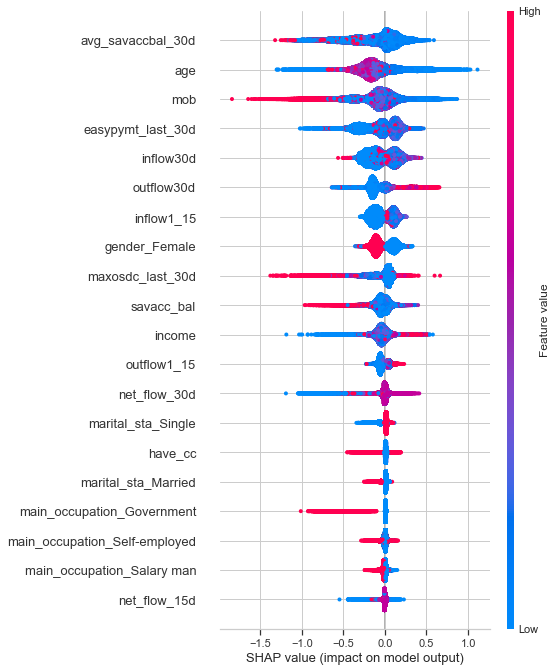

In [49]:
shap.summary_plot(shap_values, X_train_enc)

In [54]:
# Get mean absolute shap value for each feature
shap_importance = np.abs(shap_values).mean(axis=0)

# Create a DataFrame for better readability
shap_importance_df = pd.DataFrame({
    'feature': X_train_enc.columns,
    'mean_abs_shap': shap_importance
})

# Sort and get top 5 features
top5_features = shap_importance_df.sort_values(by='mean_abs_shap', ascending=False).head(5)
top5_features

,feature,mean_abs_shap
11,avg_savaccbal_30d,0.219113
4,age,0.203486
13,mob,0.196784
8,easypymt_last_30d,0.160313
14,inflow30d,0.139791


# Clustering

In [74]:
X_all_enc = pd.concat([X_train_enc[y_train==1],X_test_enc[y_test==1]],axis=0)
X_all_enc = X_all_enc[top5_features['feature'].unique()]
X_all_enc

,avg_savaccbal_30d,age,mob,easypymt_last_30d,inflow30d
38721,-0.207723,-1.124383,0.380145,-0.110749,-0.217033
183465,-0.168540,1.167460,-0.819548,-0.143529,-0.217033
151970,-0.144613,-1.436907,-0.204706,-0.115224,-0.172244
186819,-0.198884,-0.395160,0.964995,0.016622,0.829866
53436,0.089181,-0.082636,-0.819548,0.019888,-0.217033
...,...,...,...,...,...
49569,-0.203226,-1.228558,0.185195,0.033798,-0.217033
26774,-0.215466,-1.228558,-0.384660,-0.123449,-0.199798
99613,-0.212912,-0.707684,-0.819548,0.078191,-0.217033
63311,-0.098011,0.334063,-0.294683,-0.008417,0.368668


## Elbow Method

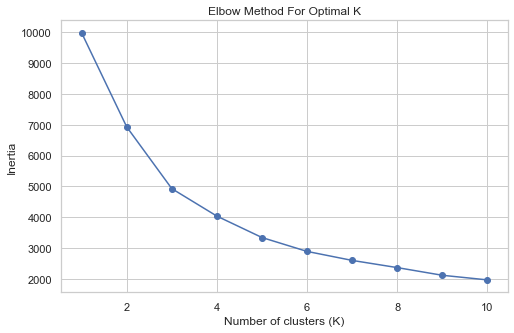

In [76]:
inertia = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_all_enc)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [78]:
optimal_k = 3  # example from elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_all_enc)

# Add cluster labels to original dataframe
X_all = pd.concat([X_train[y_train==1],X_test[y_test==1]],axis=0)
X_all = X_all[top5_features['feature'].unique()]
X_all['Cluster'] = clusters
X_all

,avg_savaccbal_30d,age,mob,easypymt_last_30d,inflow30d,Cluster
38721,625.82,27.0,80.0,271.0,0.00,1
183465,3407.60,49.0,0.0,0.0,0.00,0
151970,5106.23,24.0,41.0,234.0,5200.00,1
186819,1253.32,34.0,119.0,1324.0,121545.27,1
53436,21704.34,37.0,0.0,1351.0,0.00,1
...,...,...,...,...,...,...
49569,945.06,26.0,67.0,1466.0,0.00,1
26774,76.10,26.0,29.0,166.0,2001.00,1
99613,257.41,31.0,0.0,1833.0,0.00,1
63311,8414.70,41.0,35.0,1117.0,68000.00,0


In [124]:
X_all['Cluster'].value_counts().sort_index()

0     911
1    1703
2       2
Name: Cluster, dtype: int64

## Interpret Clustering

In [85]:
pivot_mean = X_all.groupby('Cluster').median(numeric_only=True).T
pivot_mean = pivot_mean.round(2)
pivot_mean = pivot_mean.iloc[[1,2,0,3,4],:]
pivot_mean

Cluster,0,1,2
age,46.00,29.00,41.50
mob,50.00,41.00,33.00
avg_savaccbal_30d,1449.03,1057.49,13762.95
easypymt_last_30d,561.00,414.00,1666.50
inflow30d,12418.80,8246.02,4577131.42


- age: Current Age at the campaign begins.
- mob: Month on Book (unit in number of month). Lower means open any acount recently 
- avg_savaccbal_30d: Average of saving account outstanding balance in last 30 days. 
- inflow30d: Total inflow in last 30 days. Inflow = cash in to saving or current account.
- easypymt_last_30d: Total payment in last 30 days.

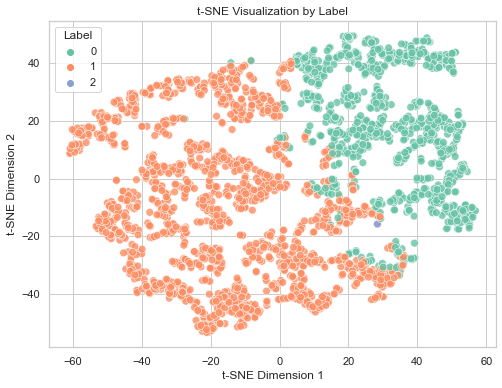

In [125]:
tsne = TSNE(n_components=2,random_state=42)
X_embedded = tsne.fit_transform(X_all_enc)

df_tsne = pd.DataFrame({
    'TSNE1': X_embedded[:, 0],
    'TSNE2': X_embedded[:, 1],
    'label': X_all['Cluster']
})

# --- 4. Plot using Seaborn ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1', y='TSNE2',
    hue='label',
    palette='Set2',   # or custom palette
    alpha=0.8,
    s=60              # point size
)

plt.title('t-SNE Visualization by Label')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Label')
plt.show()